
#**Ultralytics YOLOv9(s) Model Training**
---

**Base Model**: YOLOv9 (https://github.com/WongKinYiu/yolov9)

**Current Dataset**: American Sign Language Letters Dataset V1 (https://public.roboflow.com/object-detection/american-sign-language-letters/1)

**Tutorials used**:

*   [How to Train Ultralytics YOLOv8 Models on Your Custom Dataset in Google Colab | Episode 3
](https://www.youtube.com/watch?v=LNwODJXcvt4)
*   [Ultralytics YOLO Docs](https://docs.ultralytics.com/)
*   [YOLOv8: How to Train for Object Detection on a Custom Dataset
](https://www.youtube.com/watch?v=wuZtUMEiKWY&list=PLZCA39VpuaZZ1cjH4vEIdXIb0dCpZs3Y5)




---

In [ ]:
!nvidia-smi # Checking GPU

Fri Oct  4 05:50:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Installing Dependencies**


---



In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.4/112.6 GB disk)


In [ ]:
%pip install roboflow

In [ ]:
%pip install torch

# **Install YOLO**


---



In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.1+cu121>=1.8.0
torchvision         ✅ 0.19.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.8>=2.0.0
torch               ✅ 2.4.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"


# **Install Dataset**
---


**IMPORTANT**: Change paths of train, test, val images in "data.yaml"

test:  /content/American-Sign-Language-Letters-1/test/images

train: /content/American-Sign-Language-Letters-1/train/images

val: /content/American-Sign-Language-Letters-1/valid/images

In [ ]:
from roboflow import Roboflow
API_KEY = ''
rf = Roboflow(api_key=API_KEY) # API KEY
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(1)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov9:: 100%|██████████| 3468/3468 [00:00<00:00, 9683.15it/s]


# **Training**

Training the model with the dataset

---
**Epochs**: Total number of training cycles influences training duration and model performance, more epochs can lead to better accuracy

**box_loss (bounding box regression loss)**: Quantifies how well the predicted bounding boxes match the ground-truth boxes (i.e., the true locations of the objects). A lower value means that the predicted boxes are getting closer to the true boxes over time.

**cls_loss (classification loss)**: Measures how well the model classifies the detected objects into the correct classes. A lower value indicates that the model is getting better at assigning the right class labels to detected objects.

**dfl_loss (Distribution Focal Loss)**: DFL is specific to the YOLOv9 architecture. DFL helps in better localization by refining the object boundary predictions. A lower DFL value signifies improved boundary prediction accuracy.

In [ ]:
!yolo task=detect mode=train model=yolov9s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/American-Sign-Language-Letters-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

# **Results**

---
More graphs can be found in '/content/runs/results'


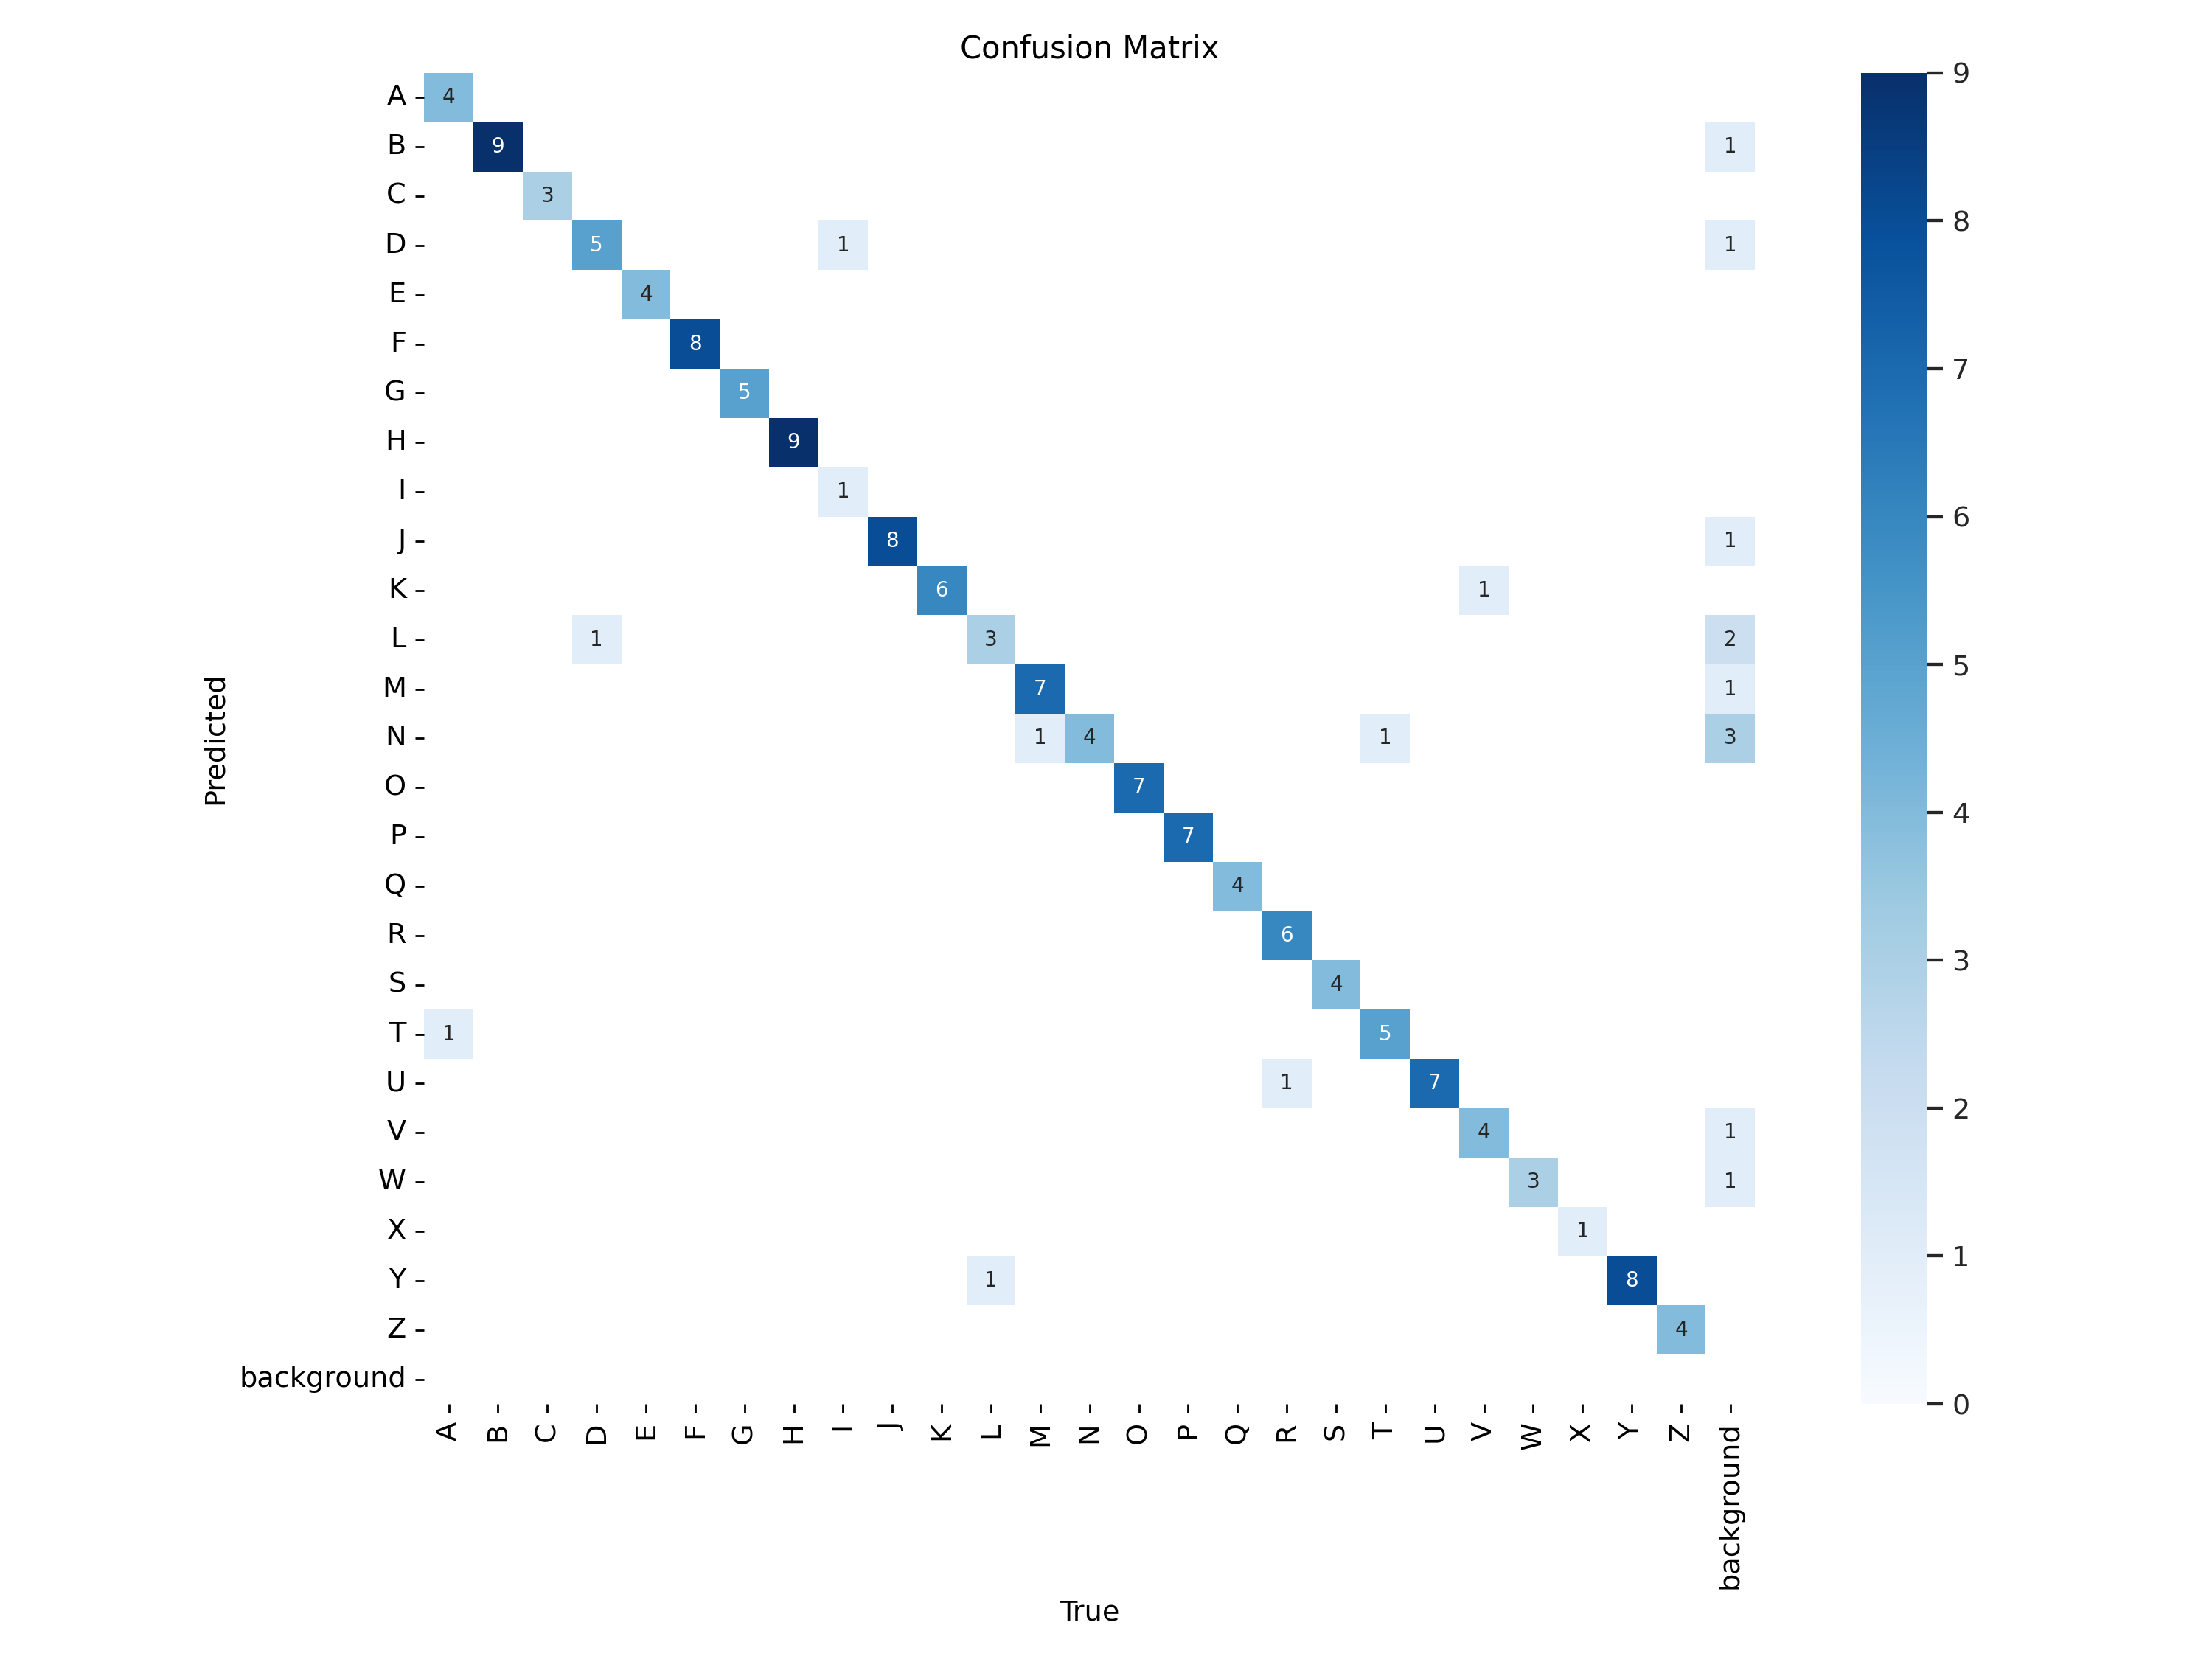

In [ ]:
Image(filename=f'/content/runs/detect/train4/confusion_matrix.png')

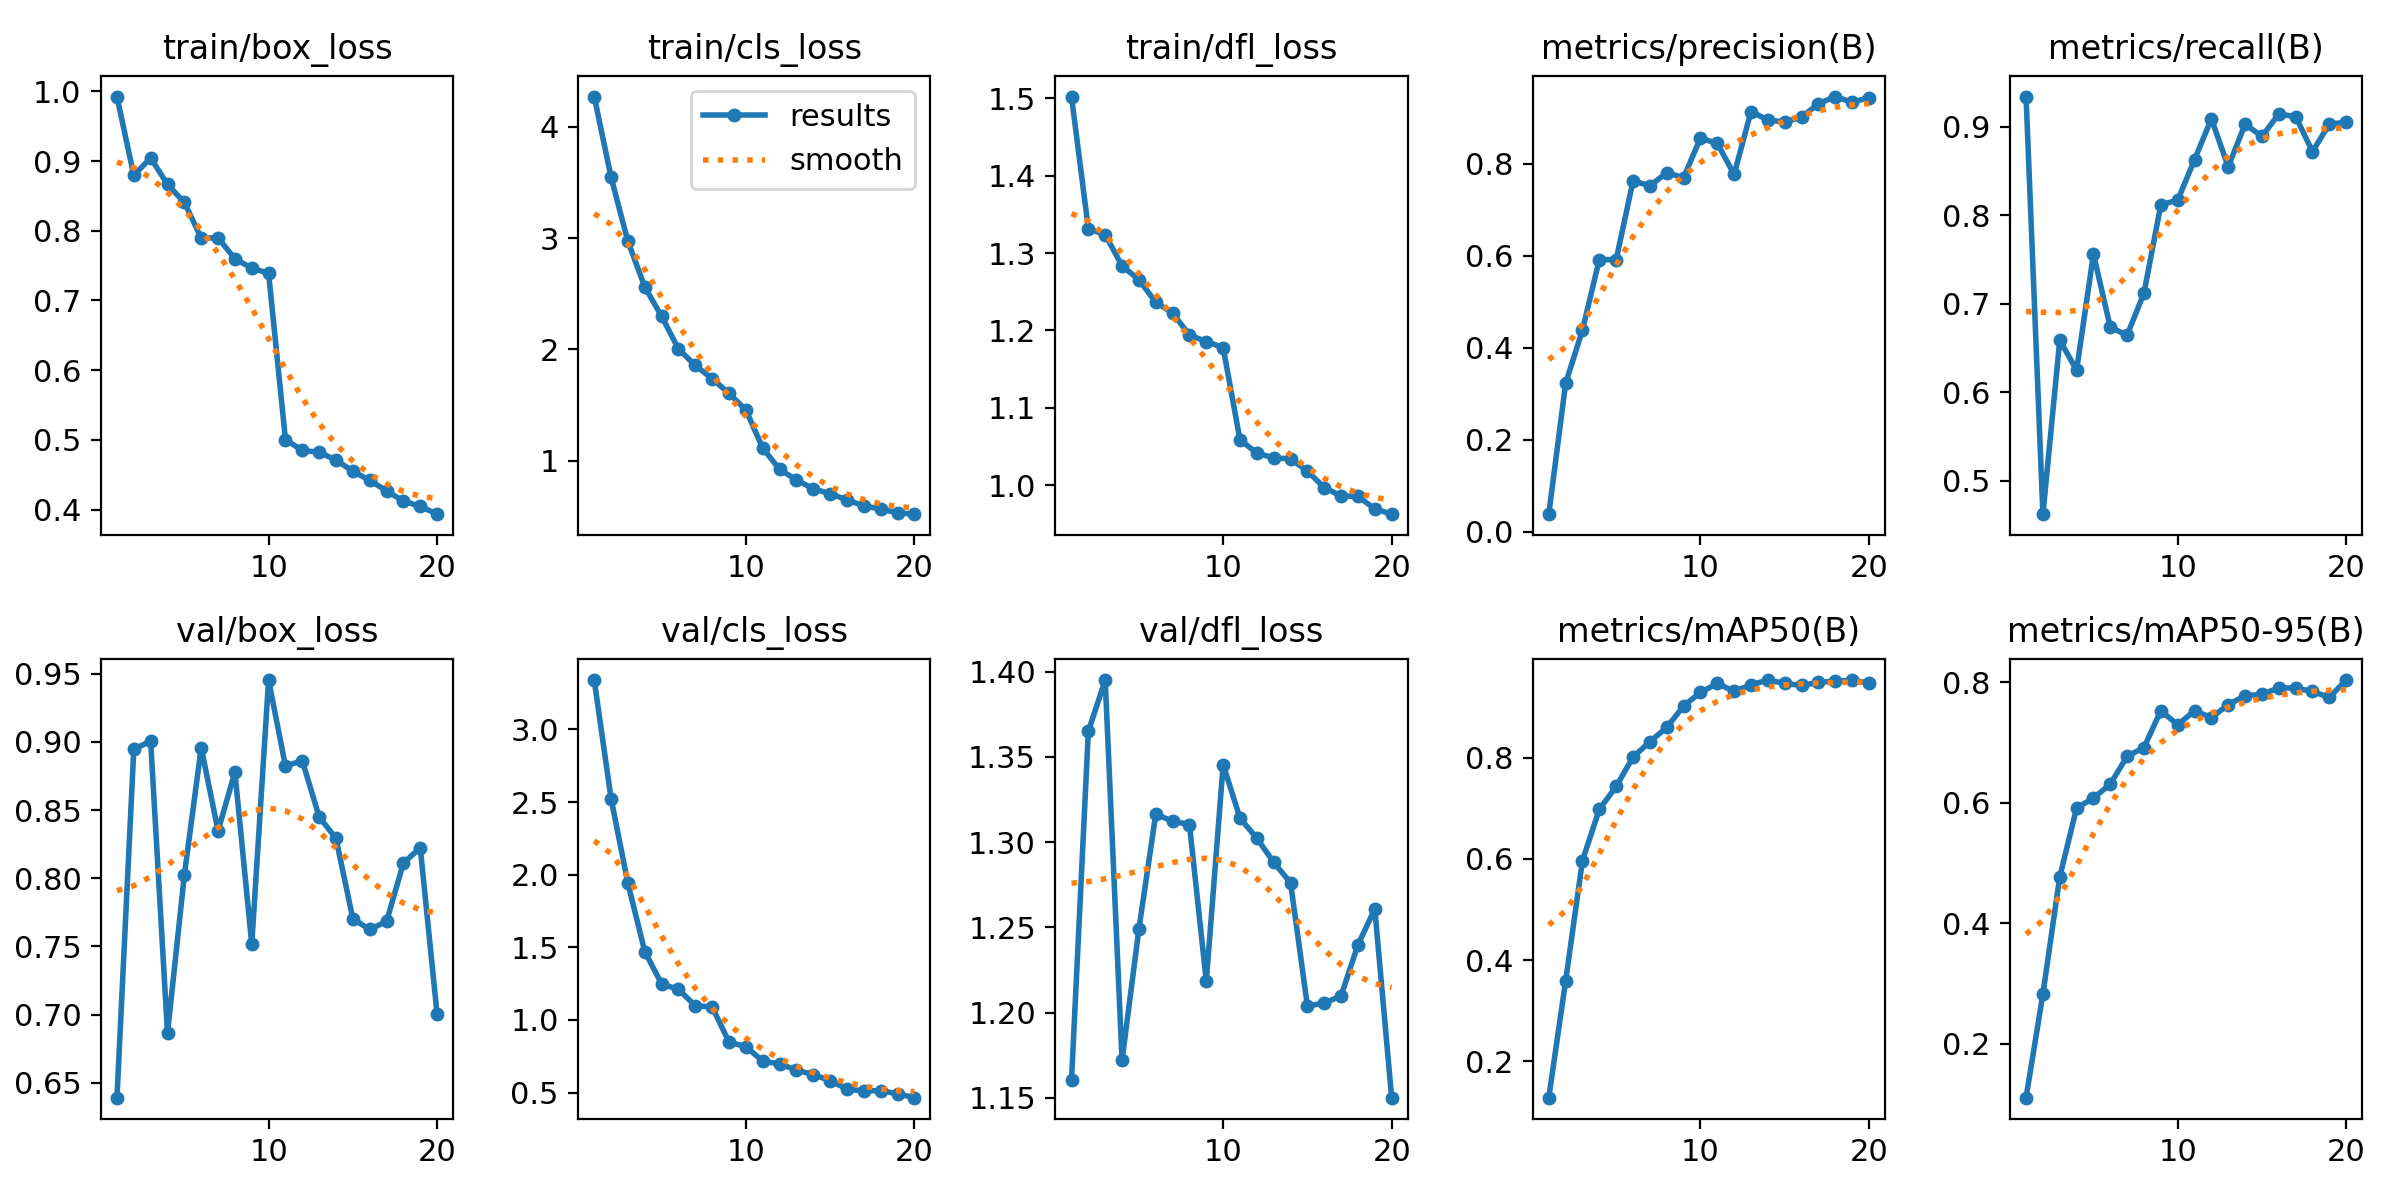

In [ ]:
Image(filename=f'/content/runs/detect/train4/results.png')

# **Validating**

Assessing the quality and metrics of the model

---


**Instances**: How many times an object of that class appears in the validation set

**Box(P)**: The percision of the bounding box. Precision measures the proportion of true positive detections among all positive predictions (true positives + false positives). A higher value means the model is making fewer false positive predictions.

**R (Recall)**: Recall measures the proportion of actual objects (true positives) that were correctly detected out of all objects present in the dataset (true positives + false negatives). A higher recall means the model is detecting more objects present in the image.

**mAP50**: The mean Average Precision (mAP) at a 0.50 Intersection over Union (IoU) threshold. It shows how well the model is detecting objects with at least 50% overlap between the predicted and ground-truth bounding boxes. It provides an overall accuracy for each class at this threshold.

**mAP50-95**: This is the mean Average Precision across IoU thresholds ranging from 0.50 to 0.95 (in steps of 0.05). It gives a more stringent evaluation of how well the model is performing across a range of overlap thresholds.


---



In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 504 layers, 6,203,710 parameters, 0 gradients, 22.1 GFLOPs
val: Scanning /content/American-Sign-Language-Letters-1/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:04<00:00,  1.87it/s]
                   all        144        144      0.943      0.905      0.948      0.803
                     A          5          5      0.968        0.8      0.872      0.754
                     B          9          9      0.974          1      0.995      0.823
                     C          3          3      0.991          1      0.995      0.796
                     D          6          6          1      0.873      0.995      0.875
                     E          4          4      0.971          1      0.995      0.895
                     F         

# **Predict Test**
Testing model accuracy with images from test

---


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 504 layers, 6,203,710 parameters, 0 gradients, 22.1 GFLOPs

image 1/72 /content/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 640x640 1 A, 19.2ms
image 2/72 /content/American-Sign-Language-Letters-1/test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg: 640x640 1 B, 19.3ms
image 3/72 /content/American-Sign-Language-Letters-1/test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg: 640x640 1 B, 19.2ms
image 4/72 /content/American-Sign-Language-Letters-1/test/images/B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg: 640x640 1 B, 19.2ms
image 5/72 /content/American-Sign-Language-Letters-1/test/images/C17_jpg.rf.ceb81f8ae3c3673bd060ebe71848eca8.jpg: 640x640 1 C, 19.2ms
image 6/72 /content/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg: 640x640 1 C, 19.2ms
image 7/72 /content/American-S

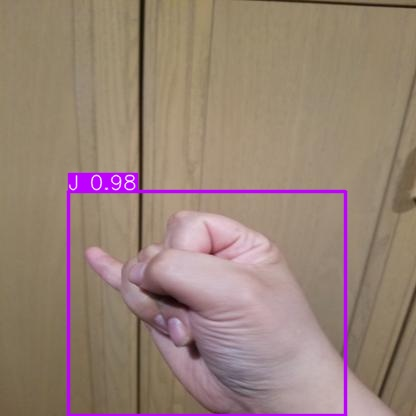

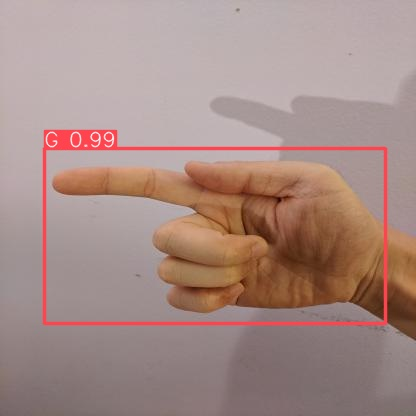

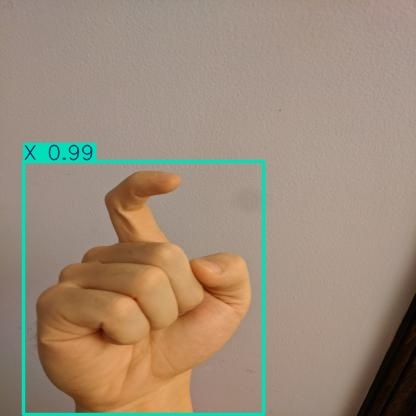

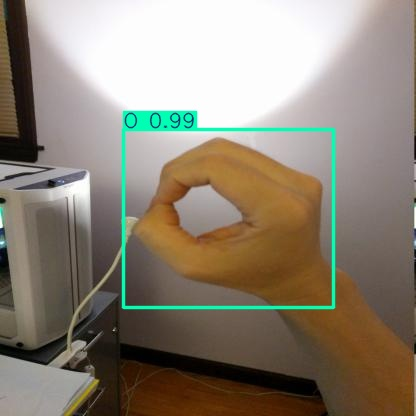

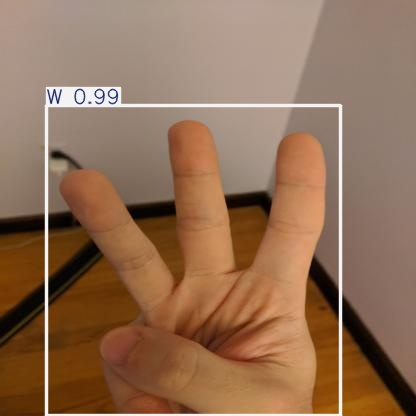

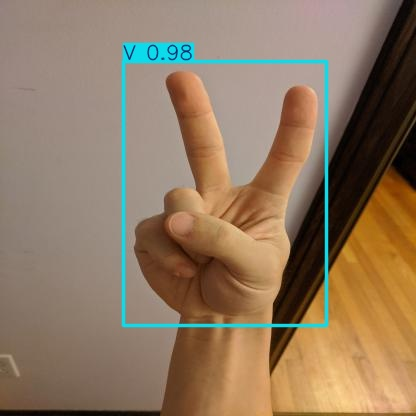

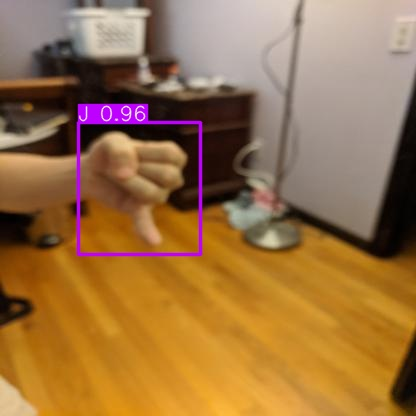

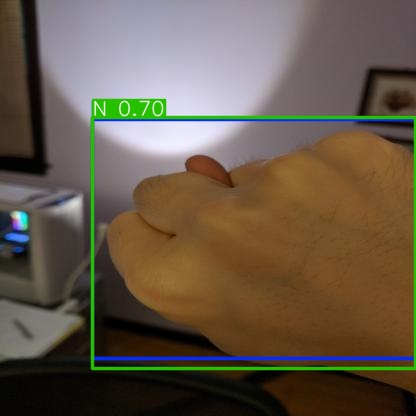

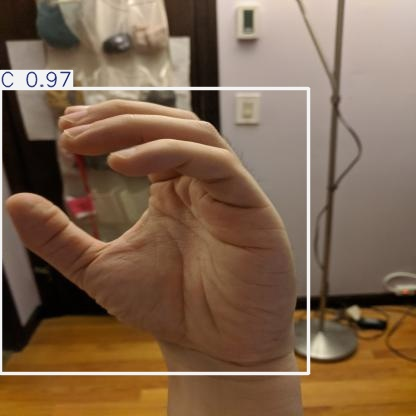

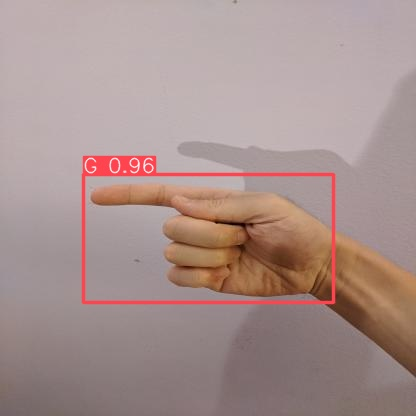

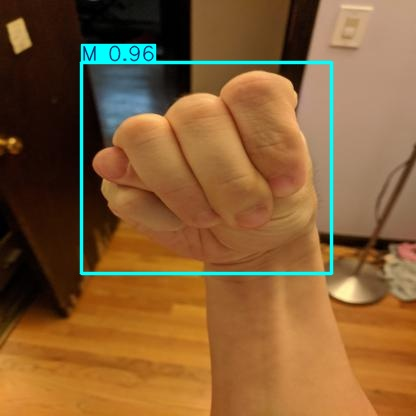

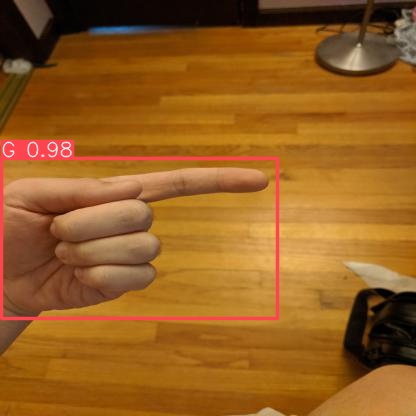

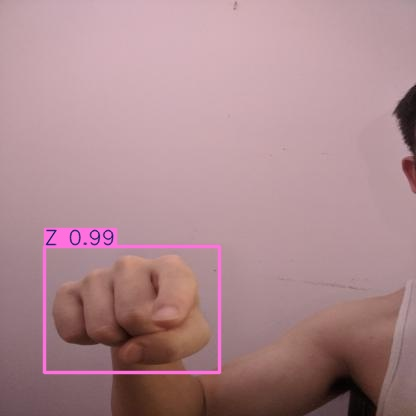

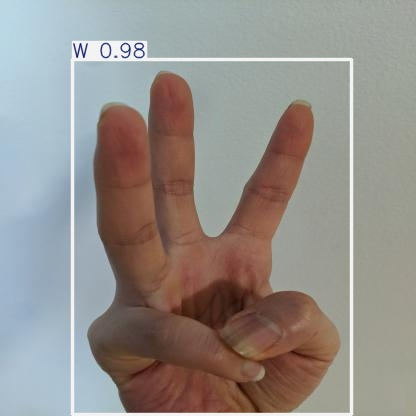

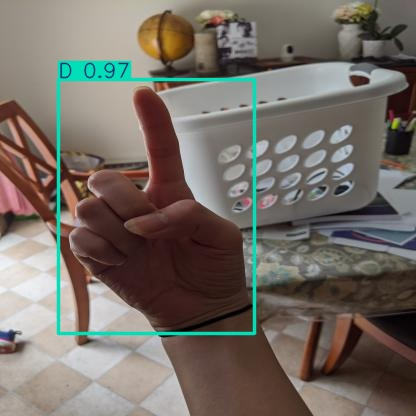

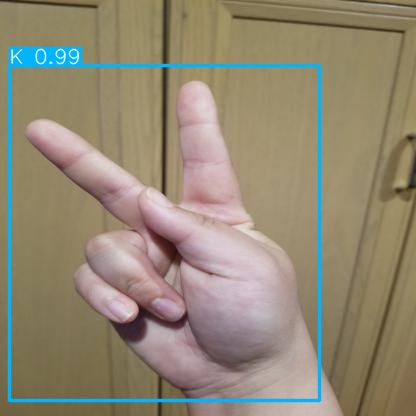

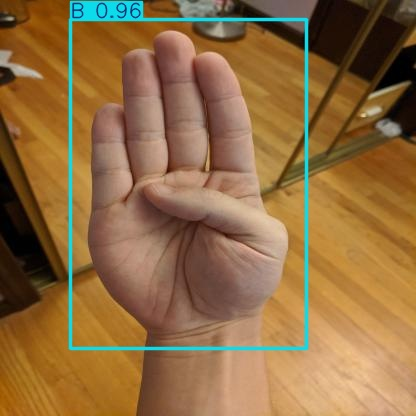

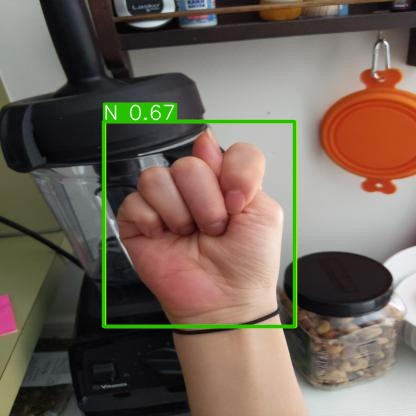

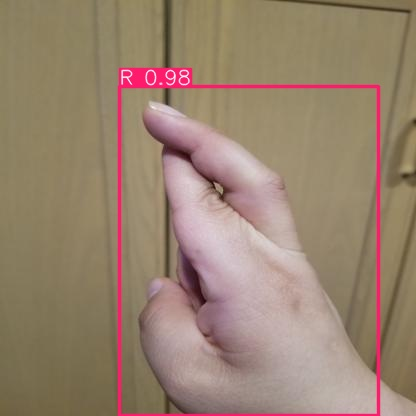

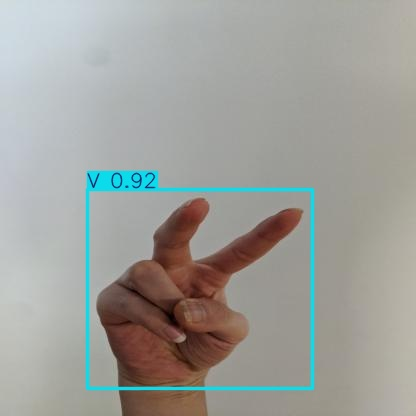

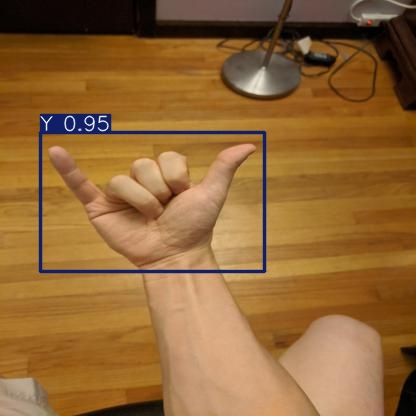

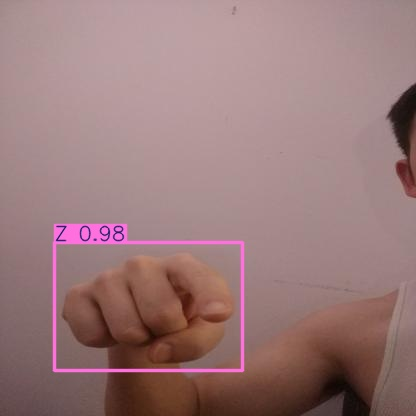

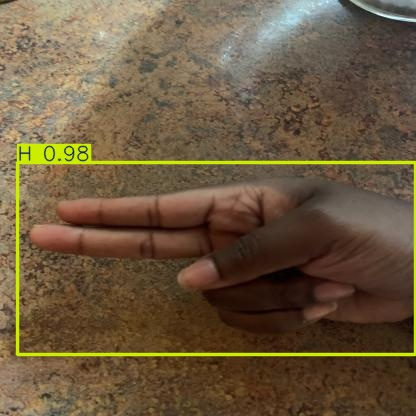

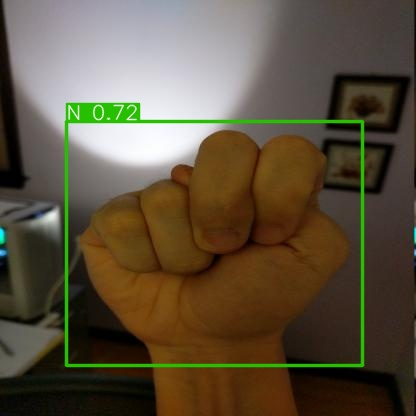

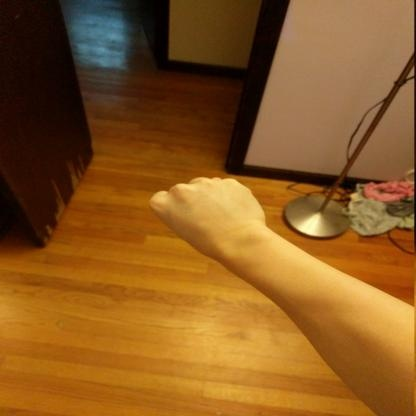

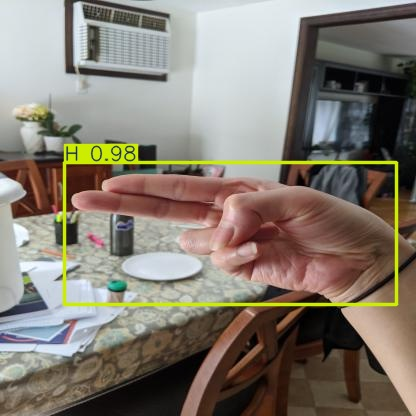

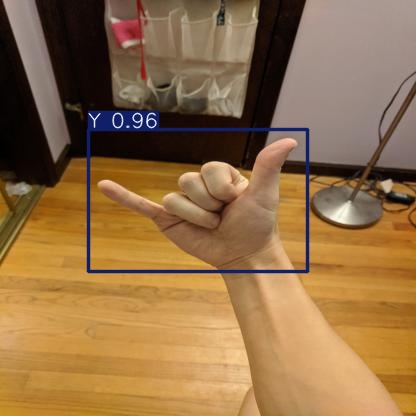

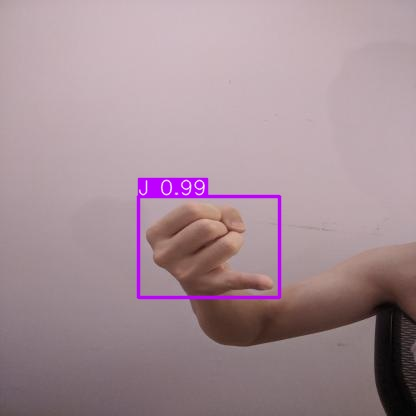

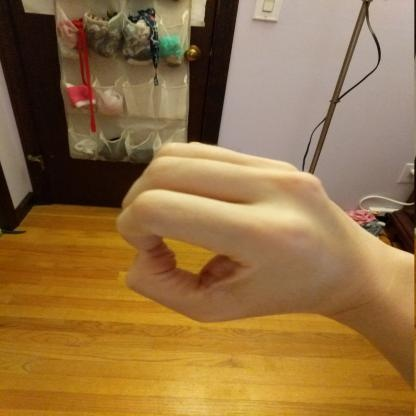

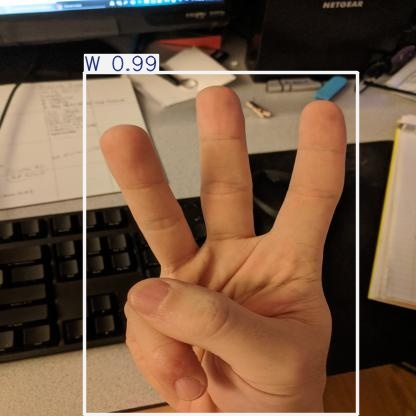

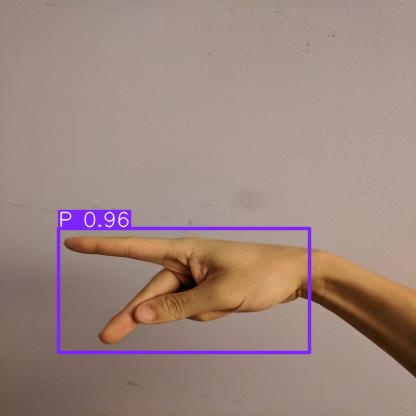

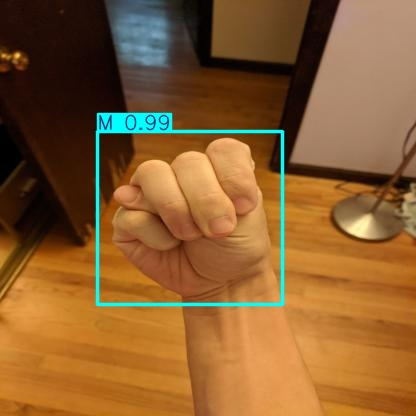

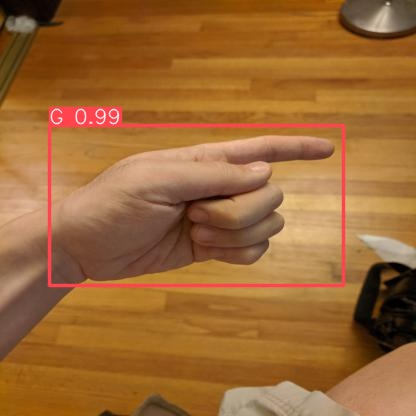

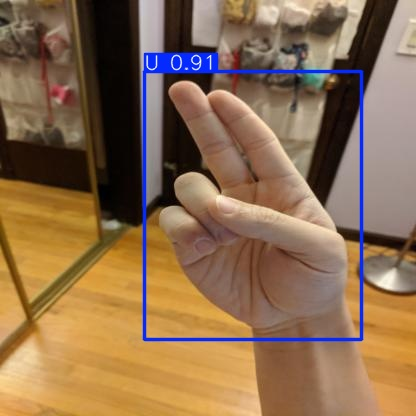

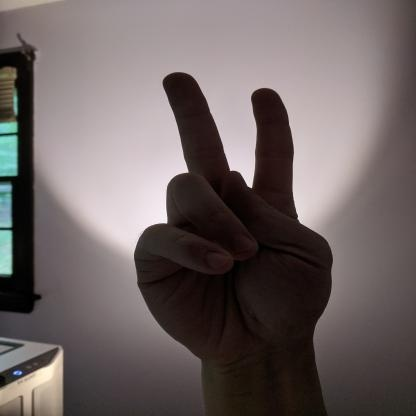

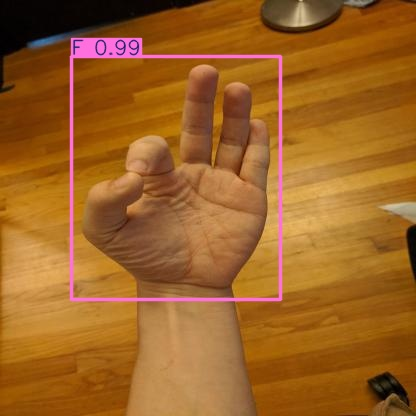

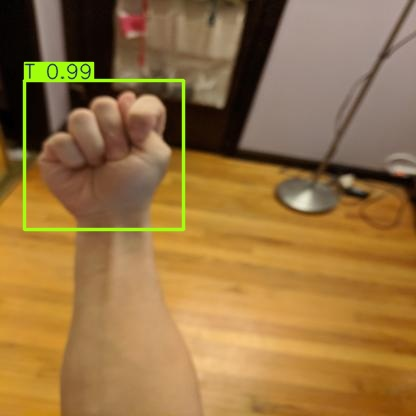

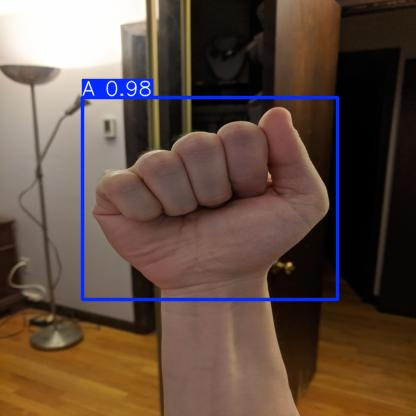

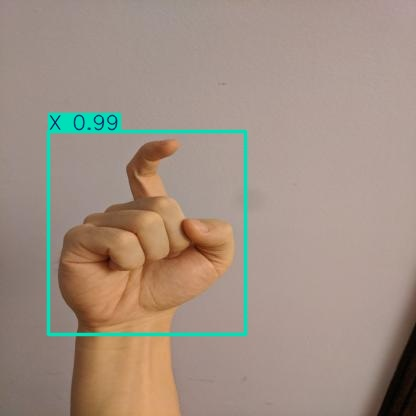

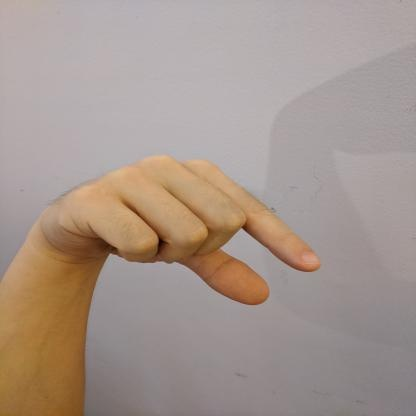

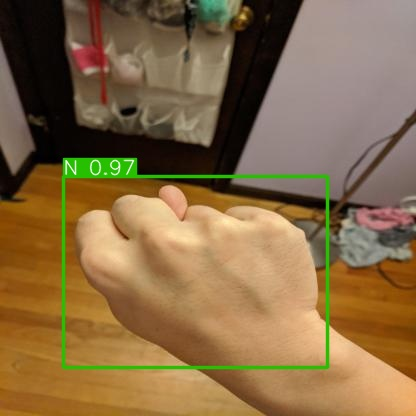

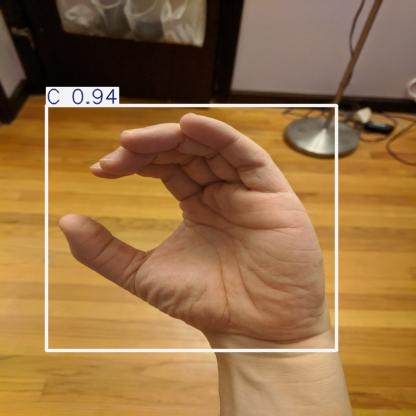

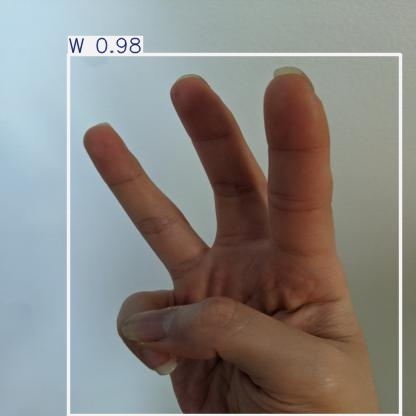

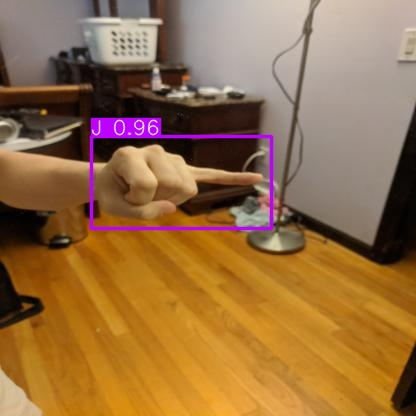

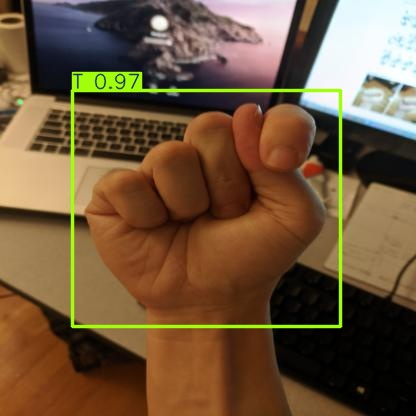

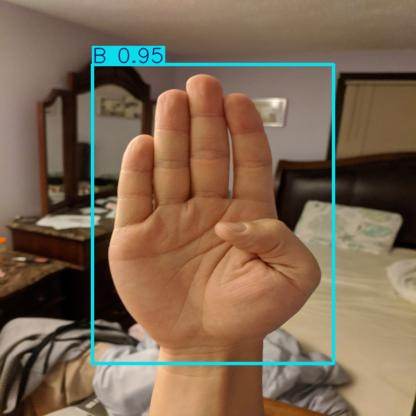

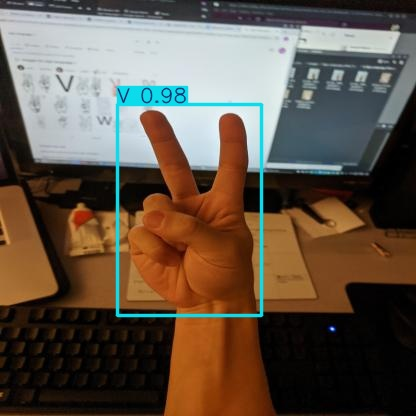

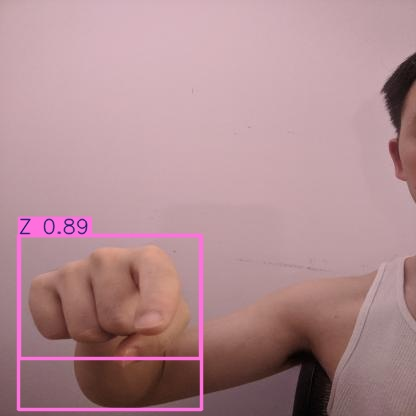

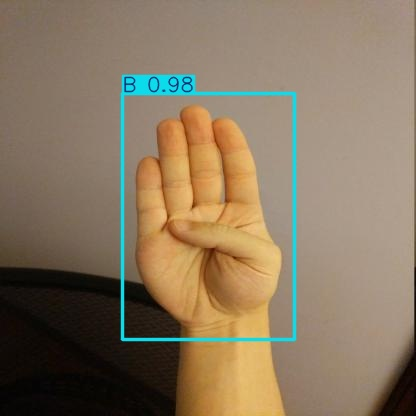

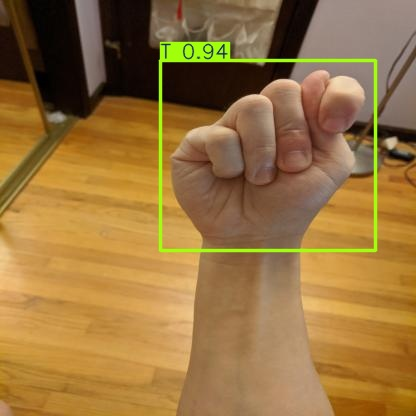

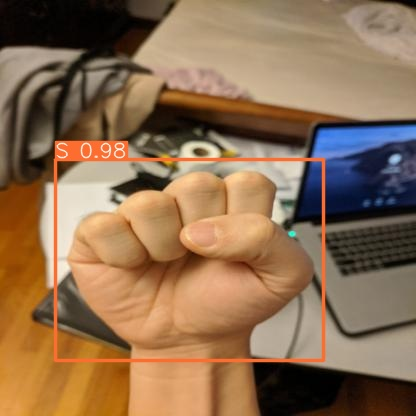

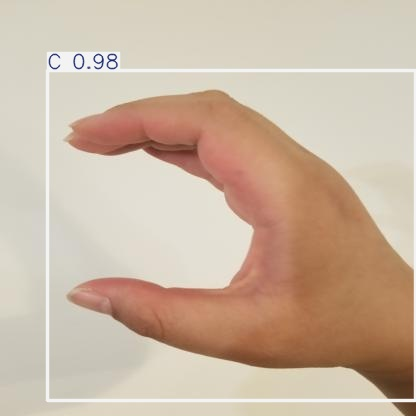

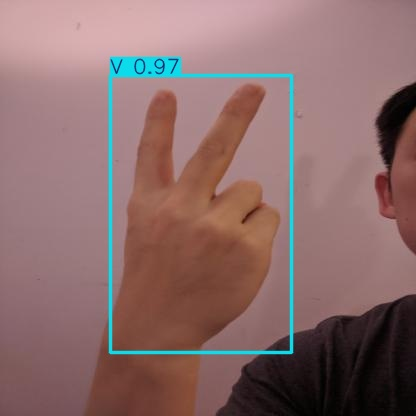

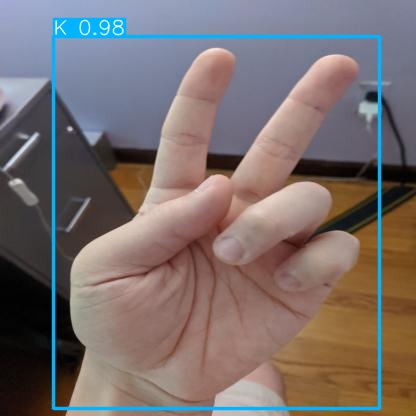

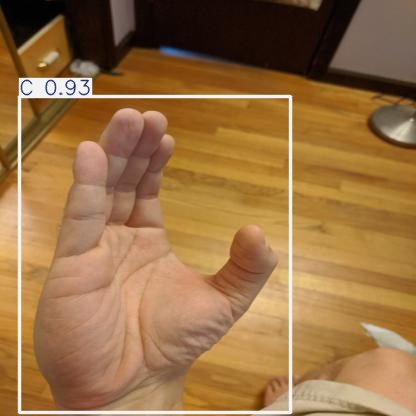

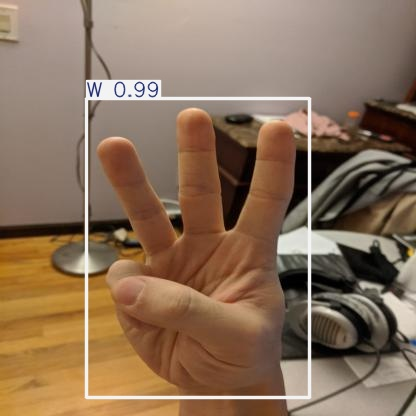

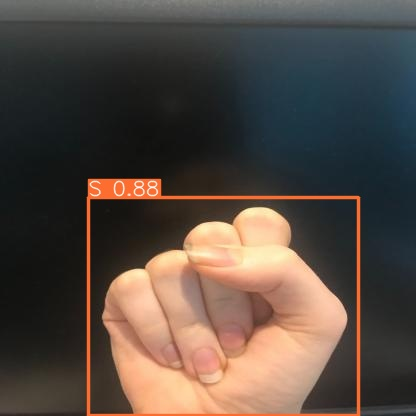

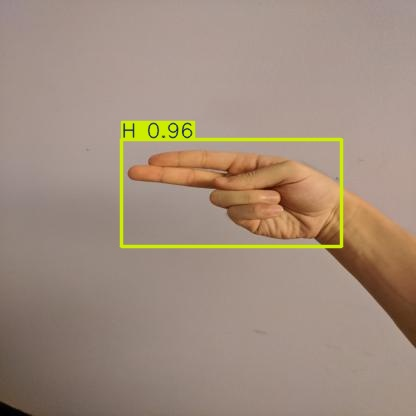

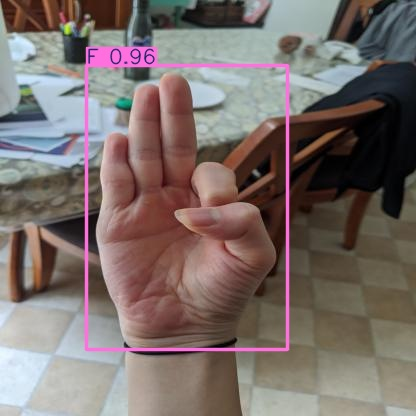

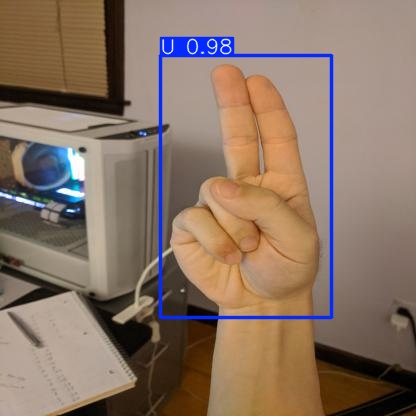

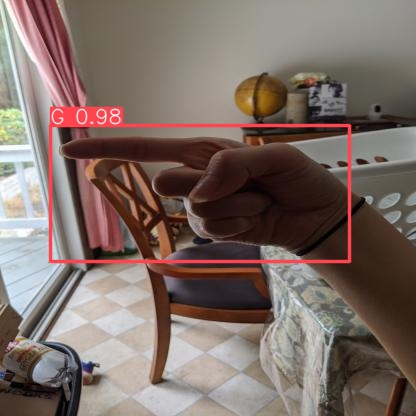

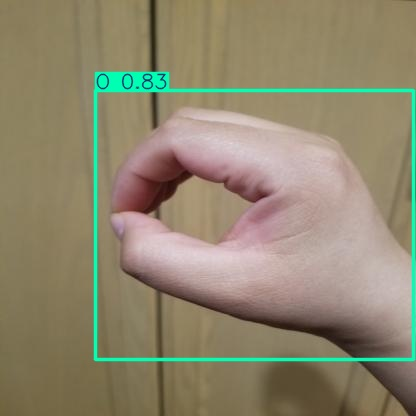

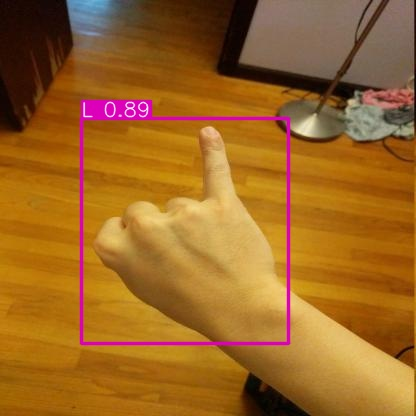

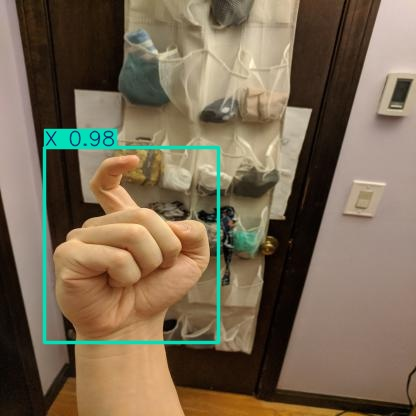

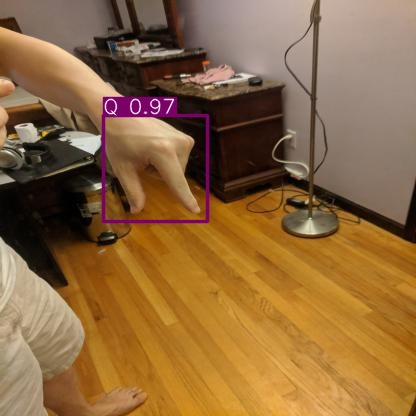

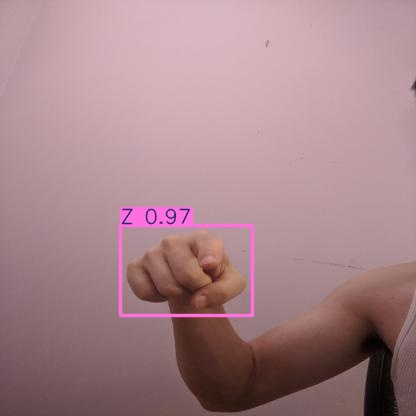

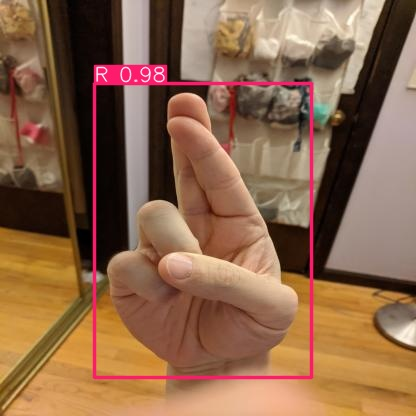

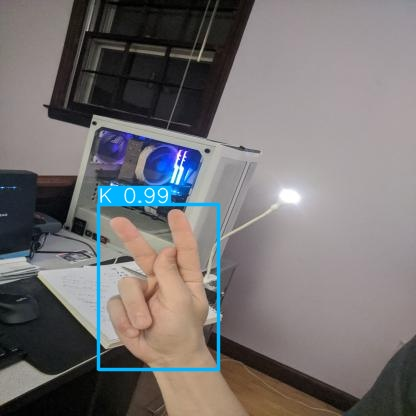

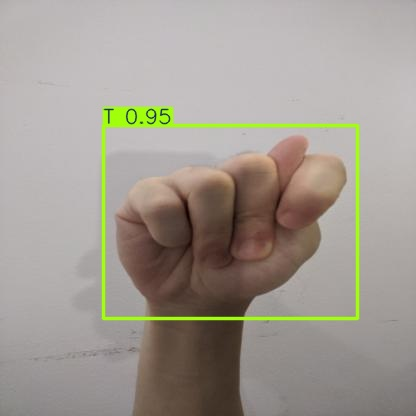

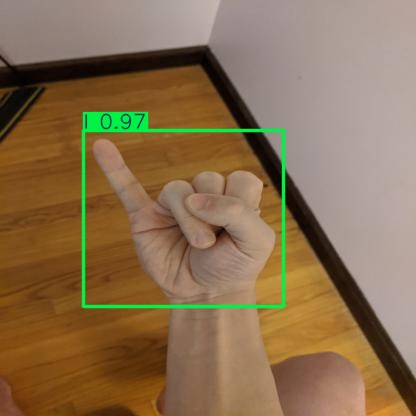

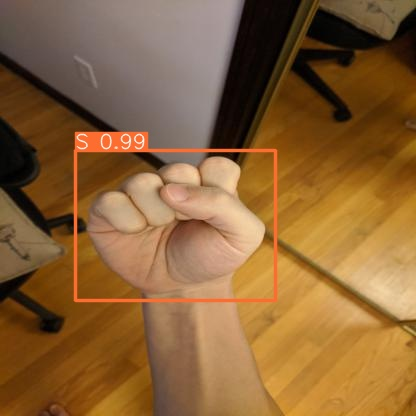

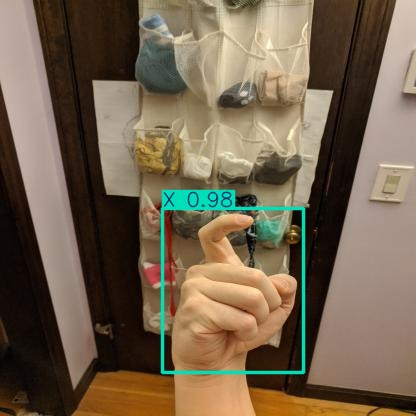

In [ ]:
# Function used for printing images
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=200))
  print("\n")

# **Benchmarking**

Benchmarking model performance

---



In [ ]:
from ultralytics.utils.benchmarks import benchmark

benchmark(model='', data={dataset.location}/data.yaml, imgsz=640, half=False, device=0)

# **Exporting Model**

Exporting model as different file types

---



In [ ]:
!yolo export model=path/to/best.pt format=onnx  # export custom trained model